In [1]:
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt

In [34]:
def wavelength_to_pulsation(wl):
    return (2*np.pi*c)/(wl)

def pulsation_to_wavelength(om):
    return (2*np.pi*c)/(om)

In [95]:
target_central_wl = 600e-9
target_puls = wavelength_to_pulsation(target_central_wl)
epsilon = 10e-9

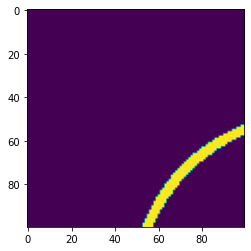

In [96]:
a=9.382740032052839e-08 
n1=np.linspace(1,4,100)
n2=n1
N1 , N2 = np.meshgrid(n1,n2)
wm = 2*np.pi*c*(N1+N2)/(a*4*N1*N2)
l = 2*np.pi*c/wm

#plt.figure()
#plt.imshow(l)
#plt.colorbar()
#plt.savefig('figure.pdf')
#plt.show()
#plt.close()

ind= np.where((l>(target_central_wl-epsilon)) & (l<(target_central_wl+epsilon)))
indzero = np.where((l>(target_central_wl-epsilon)) & (l<(target_central_wl+epsilon))==False)
mask = np.ones(N1.shape)
mask[indzero] = 0
N1_new,N2_new = N1[ind],N2[ind]
plt.imshow(mask)

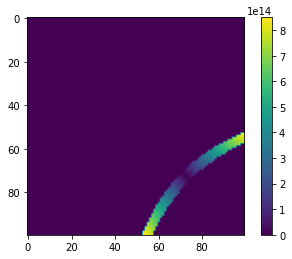

2.216475988100627e-06


In [97]:
Dw =(4/(np.pi))*np.arcsin(np.abs(N1-N2)/(N1+N2))*target_puls
plt.figure()
plt.imshow(Dw*mask)
plt.colorbar()
plt.show()
plt.close()
print(pulsation_to_wavelength(np.max(Dw*mask)))

In [101]:
def get_max_bandgap(n1,n2,a,target_puls):
    wm = 2*np.pi*c*(N1+N2)/(a*4*N1*N2)
    l = 2*np.pi*c/wm
    indzero = np.where((l>(target_central_wl-epsilon)) & (l<(target_central_wl+epsilon))==False)
    mask = np.ones(N1.shape)
    mask[indzero] = 0
    Dw =(4/(np.pi))*np.arcsin(np.abs(N1-N2)/(N1+N2))*target_puls
    ind_for_disp = np.where(Dw*mask==np.max(Dw*mask))
    return (pulsation_to_wavelength(np.max(Dw*mask)), n1[ind_for_disp],n2[ind_for_disp])

In [135]:
def get_max_bandgap(n1_given,n2_given,a,target_wl_user):
    wm = 2*np.pi*c*(n1_given+n2_given)/(a*4*n1_given*n2_given)
    l = 2*np.pi*c/wm
    indzero = np.where((l>(target_wl_user-epsilon)) & (l<(target_wl_user+epsilon))==False)
    mask = np.ones(n1_given.shape)
    mask[indzero] = 0
    Dw =(4/(np.pi))*np.arcsin(np.abs(n1_given-n2_given)/(n1_given+n2_given))*wavelength_to_pulsation(target_wl_user)
    ind_for_disp = np.where(Dw*mask==np.max(Dw*mask))
    print(ind_for_disp)
    return (pulsation_to_wavelength(np.max(Dw*mask)), n1_given[ind_for_disp],n2_given[ind_for_disp])

In [136]:
print(get_max_bandgap(N1,N2,a,700e-9))

(array([80, 99]), array([99, 80]))
(7.082133713657666e-06, array([4.        , 3.42424242]), array([3.42424242, 4.        ]))


In [139]:
d1 = 700e-9/(4*4)
d2 = 700e-9/(4*3.42)
print(d1)
print(d2)

print(d1+d2)

4.375e-08
5.116959064327485e-08
9.491959064327486e-08
